# separando por classe

In [1]:
import numpy as np #Numpy para manipulações algébricas
import matplotlib.pyplot as plt #matplotlib para plotar gráficos
import pandas as pd #pandas para manipulação de dados
import seaborn as sns #seaborn visualização estatística
import matplotlib.ticker as ticker
from datetime import date
from itertools import *
import matplotlib.dates as mdates
import numpy as np
import time

In [2]:
# Configurações de plotagem
plt.rcParams.update({
    'font.size': 14,
    
    'xtick.color': 'black', #color: 'white' porque a tela é preta
    'ytick.color': 'black',
    'axes.labelcolor': 'black',
    'axes.titlecolor': 'black',
    'axes.titlesize': 20,
    'figure.figsize': (25,10)
})

# Configurando para warnings do pandas não aparecerem
pd.options.mode.chained_assignment = None

# Ignorando Future Warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# 3 Dados de 01/09/2021 a 31/05/2022

df1 = pd.read_csv("2021-11-10 13_31_04Z.csv") # 01/09/2021 a 15/09/2021
df2 = pd.read_csv("2021-11-10 13_32_57Z.csv") # 16/09/2021 a 30/09/2021
df3 = pd.read_csv("2021-11-10 13_40_19Z.csv") # 01/10/2021 a 15/10/2021
df4 = pd.read_csv("2021-11-10 13_57_36Z.csv") # 16/10/2021 a 31/10/2021
df5 = pd.read_csv("2021-11-11 18_21_15Z.csv") # 01/11/2021 a 11/11/2021 
df6 = pd.read_csv("2022-01-03 18_19_44Z.csv") # 16/11/2021 a 30/11/2021
df7 = pd.read_csv("2022-01-03 18_22_29Z.csv") # 01/12/2021 a 15/12/2021
df8 = pd.read_csv("2022-01-03 18_25_52Z.csv") # 16/12/2021 a 31/12/2021
df9 = pd.read_csv("2022-02-01 11_20_25Z.csv") # 01/01/2022 a 15/01/2022


In [5]:
data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True)
data

,Horário do trem,Site,Tipo de sensor,Número do veículo,Número do eixo do trem,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Velocidade do eixo,Extremidade do eixo,...,Alerta de espessura do friso,Altura do friso (mm),Alerta de altura do friso,Espessura da banda de rodagem (mm),Alerta de espessura da banda de rodagem,Cava na roda do trilho (mm),Alerta de cava na roda,Distância entre faces internas (mm),Alerta de distância entre as faces internas,Diâmetro da roda (mm)
0,15/09/2021 23:04:17,RH07 Linha 1,WPM,2,9,GDE 202957,1.0,R,42,B,...,0,"29,4",0,"45,8",0,"0,4",0,919.0,3,NaN
1,15/09/2021 23:04:17,RH07 Linha 1,WPM,2,9,GDE 202957,1.0,L,42,B,...,0,"29,2",0,"46,3",0,"0,5",0,919.0,3,NaN
2,15/09/2021 23:04:17,RH07 Linha 1,WPM,2,10,GDE 202957,2.0,R,42,B,...,0,"28,9",0,"41,8",0,"0,7",0,920.0,3,795.0
3,15/09/2021 23:04:17,RH07 Linha 1,WPM,2,10,GDE 202957,2.0,L,42,B,...,0,"28,3",0,"42,9",0,"0,3",0,920.0,3,NaN
4,15/09/2021 23:04:17,RH07 Linha 1,WPM,2,11,GDE 202957,3.0,R,42,B,...,0,"28,1",0,"37,1",0,0,0,919.0,3,782.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644739,01/01/2022 00:46:53,RH07 Linha 1,WPM,258,1038,GDE 205929,3.0,R,49,A,...,0,"28,1",0,"54,6",0,0,0,918.0,3,816.0
2644740,01/01/2022 00:46:53,RH07 Linha 1,WPM,258,1039,GDE 205929,2.0,L,49,A,...,0,"27,6",0,58,0,"0,2",0,922.0,3,815.0
2644741,01/01/2022 00:46:53,RH07 Linha 1,WPM,258,1039,GDE 205929,2.0,R,49,A,...,0,28,0,"57,5",0,0,0,922.0,3,817.0
2644742,01/01/2022 00:46:53,RH07 Linha 1,WPM,258,1040,GDE 205929,1.0,L,49,A,...,0,"28,8",0,49,0,"0,5",0,923.0,3,810.0


In [6]:
data.isnull().sum()[data.isnull().sum() != 0] 
# Visualização de variaveis com dados faltantes

Número do eixo do veículo                   8
Lateral do veículo                          8
Espessura da banda de rodagem (mm)        719
Cava na roda do trilho (mm)              3789
Distância entre faces internas (mm)    213689
Diâmetro da roda (mm)                  361031
dtype: int64

In [7]:
# Separando data e hora para poder categorizar de acordo com a data
data['Horário do trem'] = pd.to_datetime(data['Horário do trem'], format='%d/%m/%Y  %H:%M:%S')
data = data.sort_values(by=['Horário do trem'])
data['Dia do trem'] = data['Horário do trem'].dt.strftime("%d/%m/%Y")
data['Hora do trem'] = data['Horário do trem'].dt.strftime("%H:%M:%S")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644744 entries, 332687 to 2427589
Data columns (total 25 columns):
 #   Column                                       Dtype         
---  ------                                       -----         
 0   Horário do trem                              datetime64[ns]
 1   Site                                         object        
 2   Tipo de sensor                               object        
 3   Número do veículo                            int64         
 4   Número do eixo do trem                       int64         
 5   Identificação do veículo                     object        
 6   Número do eixo do veículo                    float64       
 7   Lateral do veículo                           object        
 8   Velocidade do eixo                           int64         
 9   Extremidade do eixo                          object        
 10  Direção                                      object        
 11  Lateral da linha                

In [9]:
# Remoção de colunas que não queremos analisar
sem_valor = ['Site', 'Tipo de sensor', 'Direção', 'Distância entre faces internas (mm)', 
             'Alerta de distância entre as faces internas','Horário do trem', 'Hora do trem','Número do veículo',
             'Número do eixo do trem','Extremidade do eixo','Lateral da linha','Velocidade do eixo',
             'Diâmetro da roda (mm)']
data.drop(sem_valor, axis =1, inplace=True) 

In [10]:
data

,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Espessura do friso (mm),Alerta de espessura do friso,Altura do friso (mm),Alerta de altura do friso,Espessura da banda de rodagem (mm),Alerta de espessura da banda de rodagem,Cava na roda do trilho (mm),Alerta de cava na roda,Dia do trem
332687,GDE 212545,2.0,L,26,0,"27,6",0,"52,9",0,0,0,01/09/2021
333333,GDE 201694,2.0,L,23,0,"29,1",0,"43,1",0,"0,6",0,01/09/2021
333334,GDE 201694,2.0,R,"25,7",0,"27,7",0,"44,3",0,"0,5",0,01/09/2021
333335,GDE 201694,1.0,L,"27,5",0,"28,2",0,"48,9",0,0,0,01/09/2021
333336,GDE 201694,1.0,R,"27,3",0,28,0,"48,5",0,0,0,01/09/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2427573,GDE 212851,3.0,L,"24,7",0,"27,7",0,37,0,0,0,15/01/2022
2427574,GDE 212851,4.0,R,"25,3",0,"28,2",0,35,0,"0,1",0,15/01/2022
2427575,GDE 212851,4.0,L,"26,5",0,"28,5",0,"34,4",0,"0,2",0,15/01/2022
2427563,GDE 207958,2.0,L,26,0,"28,4",0,58,0,"0,2",0,15/01/2022


In [11]:
data.isnull().sum()[data.isnull().sum() != 0] 
# Visualização de variaveis com dados faltantes 2 

Número do eixo do veículo                8
Lateral do veículo                       8
Espessura da banda de rodagem (mm)     719
Cava na roda do trilho (mm)           3789
dtype: int64

In [12]:
# Função que troca vírgula por ponto para ser lido como float e não object
def vporp (data, name):
    data[name] = data[name].str.replace(',', '.')

In [13]:
aux = ['Espessura do friso (mm)',
       'Altura do friso (mm)', 
       'Espessura da banda de rodagem (mm)',
       'Cava na roda do trilho (mm)'] #Colunas númericas com vírgula

for name in aux:
    vporp(data,name)

data[aux] = data[aux].astype('float64') # Mudando de object para float

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644744 entries, 332687 to 2427589
Data columns (total 12 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Identificação do veículo                 object 
 1   Número do eixo do veículo                float64
 2   Lateral do veículo                       object 
 3   Espessura do friso (mm)                  float64
 4   Alerta de espessura do friso             int64  
 5   Altura do friso (mm)                     float64
 6   Alerta de altura do friso                int64  
 7   Espessura da banda de rodagem (mm)       float64
 8   Alerta de espessura da banda de rodagem  int64  
 9   Cava na roda do trilho (mm)              float64
 10  Alerta de cava na roda                   int64  
 11  Dia do trem                              object 
dtypes: float64(5), int64(4), object(3)
memory usage: 262.3+ MB


In [15]:
# Função que visualiza quantos dados diferentes possuiamos
def lencat (df):
    for col in df.columns:
        df_group = df[col].value_counts()
        print( str(col) + ' = ' + str(len(df_group)))

In [16]:
lencat(data)

Identificação do veículo = 11842
Número do eixo do veículo = 4
Lateral do veículo = 2
Espessura do friso (mm) = 218
Alerta de espessura do friso = 5
Altura do friso (mm) = 173
Alerta de altura do friso = 4
Espessura da banda de rodagem (mm) = 643
Alerta de espessura da banda de rodagem = 5
Cava na roda do trilho (mm) = 67
Alerta de cava na roda = 2
Dia do trem = 131


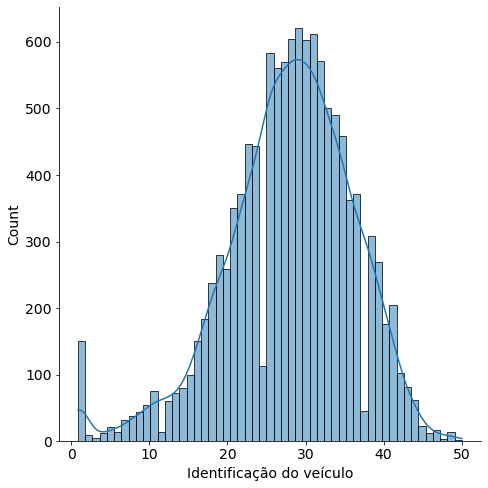

In [17]:
# números de vezes que um vagão passou por o sensor de medição
n_vagao = (data['Identificação do veículo'].value_counts())/8
sns.displot(x = n_vagao, kde=True, height=7, aspect= 1)
plt.show()

In [18]:
# Identificando os NA
df = data[data.isna().any(axis=1)] # matriz com todos os dados NA
df_list = df['Identificação do veículo'].value_counts().index.tolist()
df

,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Espessura do friso (mm),Alerta de espessura do friso,Altura do friso (mm),Alerta de altura do friso,Espessura da banda de rodagem (mm),Alerta de espessura da banda de rodagem,Cava na roda do trilho (mm),Alerta de cava na roda,Dia do trem
330751,GDE 215440,3.0,R,18.3,4,35.4,0,62.9,0,NaN,0,01/09/2021
330839,GDE 218951,3.0,R,24.8,0,29.5,0,NaN,0,1.7,0,01/09/2021
328534,GDE 57667,2.0,L,22.6,1,27.3,0,NaN,0,0.0,0,01/09/2021
328542,GDE 57666,2.0,L,25.7,0,27.5,0,NaN,0,0.0,0,01/09/2021
328544,GDE 57666,3.0,L,24.0,0,27.5,0,NaN,0,0.0,0,01/09/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2431934,GDE 213882,4.0,L,27.7,0,29.0,0,NaN,0,0.4,0,15/01/2022
2431924,GDE 213883,3.0,L,27.2,0,31.5,0,NaN,0,1.9,0,15/01/2022
2430077,GDE 215153,1.0,L,26.0,0,30.1,0,NaN,0,0.8,0,15/01/2022
2429713,GDE 200696,4.0,R,23.7,0,27.4,0,NaN,0,0.0,0,15/01/2022


In [ ]:
# Drop todos os dias de um determinado vagão que possui algum elemento NA
id = []

for row in df_list:
    list_day = df.groupby(['Identificação do veículo']).get_group(row)['Dia do trem'].value_counts().index.tolist()
    id.extend(data[(data['Dia do trem'].apply(lambda x: x in list_day)) & (data['Identificação do veículo'] == row)].index.tolist())

data.drop(id, inplace=True)

In [ ]:
data.isnull().sum()[data.isnull().sum() != 0] #conferir os dados faltantes após manipulação

In [ ]:
data = data.drop_duplicates(subset=['Identificação do veículo','Número do eixo do veículo','Lateral do veículo','Dia do trem'])

In [ ]:
n_vagao = (data['Identificação do veículo'].value_counts())/8
n_vagao_int = []
n_vagao_dec = []

for i in range(len(n_vagao)):
    n = int(n_vagao[i])
    v = n_vagao[i]
    m = v*10
    s = n*10
    if m == s:
        n_vagao_int.append(n_vagao.index[i])
    else:
        n_vagao_dec.append(n_vagao.index[i])

len(n_vagao_dec)

In [ ]:
#drop dos dias que não tinham todos os dados das 8 rodas
for a in n_vagao_dec: 
    dia1 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 1) & (data['Lateral do veículo'] == 'R')]['Dia do trem']
    dia2 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 2) & (data['Lateral do veículo'] == 'R')]['Dia do trem']
    dia3 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 3) & (data['Lateral do veículo'] == 'R')]['Dia do trem']
    dia4 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 4) & (data['Lateral do veículo'] == 'R')]['Dia do trem']
    dia5 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 1) & (data['Lateral do veículo'] == 'L')]['Dia do trem']
    dia6 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 2) & (data['Lateral do veículo'] == 'L')]['Dia do trem']
    dia7 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 3) & (data['Lateral do veículo'] == 'L')]['Dia do trem']
    dia8 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 4) & (data['Lateral do veículo'] == 'L')]['Dia do trem']
    df = list((set(dia1) | set(dia2) | set(dia3) | set(dia4) | set(dia5) | set(dia6) | set(dia7) | set(dia8)) - (set(dia1) & set(dia2) & set(dia3) & set(dia4) & set(dia5) & set(dia6) & set(dia7) & set(dia8)))
    index_names = data[(data['Dia do trem'].apply(lambda x: x in df)) & (data['Identificação do veículo'] == a)].index.tolist()

    # from dataFrame
    data.drop(index_names, inplace = True)

In [ ]:
# Sem Na e dados faltantes
data.to_csv('Vale12.csv')

In [ ]:
# definição dos grupos
data['Dia do trem'] = pd.to_datetime(data['Dia do trem'], format='%d/%m/%Y')
vagao = data['Identificação do veículo'].value_counts().index.tolist()
lado = ['R','L']
eixo = [1,2,3,4]

In [ ]:
data_group = data.groupby(['Identificação do veículo','Lateral do veículo','Número do eixo do veículo']).get_group(('GDE 212893','R',1)) #a = nome do vagão, b = R ou L e c = 1,2,3 ou 4)
idx = data_group.index.tolist()

In [ ]:
data_group

In [ ]:
inicio = time.time() #para contar o tempo 

for (a,b,c) in product(vagao,lado,eixo):
    data_group = data.groupby(['Identificação do veículo','Lateral do veículo','Número do eixo do veículo']).get_group((a,b,c)) #a = nome do vagão, b = R ou L e c = 1,2,3 ou 4)
    idx = data_group.index.tolist()
    data_group['Intervalo de Dias'] = data_group.loc[:,['Dia do trem']] - data_group.loc[idx[0],['Dia do trem']]
    data.loc[ idx, ['Intervalo de Dias']] = data_group.loc[ idx, ['Intervalo de Dias']]

fim = time.time()
print(fim - inicio)

In [ ]:
data['Intervalo de Dias'] = (pd.to_timedelta(data['Intervalo de Dias'], unit = 'D')).dt.days
data

In [ ]:
# Sem Na e dados faltantes, com intervalo de dias
data.to_csv('Vale22.csv')

In [ ]:
def classes(top, button, a, b, verso):
    
    delta = (top - button)/6
    cond = {}
    cond[0] = top
    i = 1
    while 1==1:
        cond[i] = cond[i-1] - delta
        if cond[i] == button:
            break
        else:
            i = i + 1
    
    classe = {}
    for i in range(0,8):
        if verso == False:
            classe[i] = i
        elif verso == True:
            j = list(range(7,-1,-1))
            classe[i] = j[i]
        
    data.loc[data.loc[(data[a] > cond[0]) & (data['Intervalo de Dias'] == 0)].index.tolist() , [b]] = classe[0]
    data.loc[data.loc[(data[a] > cond[1]) & (data[a] <= cond[0]) & (data['Intervalo de Dias'] == 0)].index.tolist() , [b]] = classe[1]
    data.loc[data.loc[(data[a] > cond[2]) & (data[a] <= cond[1]) & (data['Intervalo de Dias'] == 0)].index.tolist() , [b]] = classe[2]
    data.loc[data.loc[(data[a] > cond[3]) & (data[a] <= cond[2]) & (data['Intervalo de Dias'] == 0)].index.tolist() , [b]] = classe[3]
    data.loc[data.loc[(data[a] > cond[4]) & (data[a] <= cond[3]) & (data['Intervalo de Dias'] == 0)].index.tolist() , [b]] = classe[4]
    data.loc[data.loc[(data[a] > cond[5]) & (data[a] <= cond[4]) & (data['Intervalo de Dias'] == 0)].index.tolist() , [b]] = classe[5]
    data.loc[data.loc[(data[a] > cond[6]) & (data[a] <= cond[5]) & (data['Intervalo de Dias'] == 0)].index.tolist() , [b]] = classe[6]
    data.loc[data.loc[(data[a] <= cond[6]) & (data['Intervalo de Dias'] == 0)].index.tolist() , [b]] = classe[7]

In [ ]:
classes(34, 19, 'Espessura do friso (mm)', 'Classe Espessura do friso', False)
classes(35, 26, 'Altura do friso (mm)', 'Classe Altura do friso', True)
classes(80, 20, 'Espessura da banda de rodagem (mm)', 'Classe Espessura da banda de rodagem', False)
classes(3, 0, 'Cava na roda do trilho (mm)', 'Classe Cava na roda do trilho', True)

In [ ]:
d = ['Classe Espessura do friso','Classe Altura do friso','Classe Espessura da banda de rodagem','Classe Cava na roda do trilho']
vagao = data.loc[data['Intervalo de Dias'] == 0]['Identificação do veículo'].value_counts().index.tolist()
lado = ['R','L']
eixo = [1,2,3,4]

for (a,b,c) in product(vagao,lado,eixo):
    idx = data.loc[(data['Número do eixo do veículo'] == c) & (data['Lateral do veículo'] == b) & (data['Identificação do veículo'] == a)].index.tolist()
    data.loc[ idx[1:], d[0]] = data.loc[ idx[0], d[0]]
    data.loc[ idx[1:], d[1]] = data.loc[ idx[0], d[1]]
    data.loc[ idx[1:], d[2]] = data.loc[ idx[0], d[2]]
    data.loc[ idx[1:], d[3]] = data.loc[ idx[0], d[3]]

In [ ]:
def densclasse (df, columns1,columns2):
    for col1, col2 in zip(columns1, columns2):
        sns.displot(x = df[col1],hue = df[col2], kind="kde")
        plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0.)
        plt.savefig("dens5" + str(col1) + ".pdf", bbox_inches='tight')
        plt.show()

In [ ]:
columns1 = ['Espessura do friso (mm)', 'Altura do friso (mm)', 'Espessura da banda de rodagem (mm)', 'Cava na roda do trilho (mm)']
columns2 = ['Classe Espessura do friso','Classe Altura do friso','Classe Espessura da banda de rodagem','Classe Cava na roda do trilho']
densclasse(data, columns1, columns2)

In [ ]:
# Com classe
data.to_csv('Vale32.csv')
data

In [ ]:
data1.drop(['Alerta de espessura do friso', 'Alerta de altura do friso', 'Alerta de espessura da banda de rodagem', 'Alerta de cava na roda'], axis =1, inplace=True) 

In [ ]:
data2 = pd.read_csv('Vale4.csv')
data2.drop(['Unnamed: 0'], axis =1, inplace=True)

In [ ]:
data2

In [ ]:
data1 = pd.read_csv("Vale32.csv")
data1.drop(['Unnamed: 0'], axis =1, inplace=True)

In [ ]:
data1

# União dos dados

In [ ]:
vagao1 = set(data1['Identificação do veículo'].value_counts().index.tolist())
vagao2 = set(data2['Identificação do veículo'].value_counts().index.tolist())

In [ ]:
vagaoset = vagao1.intersection(vagao2)
vagao = [x for x in vagaoset]

In [ ]:
intervalo_entre_dados = []

for i in range(len(vagao)):
    dia1 = data1.loc[data1.loc[(data1['Intervalo de Dias'] == 0) & (data1['Identificação do veículo'] == vagao[i])].index.tolist()[0],['Dia do trem']]
    dia2 = data2.loc[data2.loc[(data2['Intervalo de Dias'] == 0) & (data2['Identificação do veículo'] == vagao[i])].index.tolist()[0],['Dia do trem']]
    intervalo_entre_dados.extend(abs(dia2 - dia1))

In [ ]:
intervalo_entre_dados = (pd.to_timedelta(intervalo_entre_dados, unit = 'D')).days
intervalo_entre_dados

In [ ]:
for i in range(len(vagao)):
    data1.loc[data1['Identificação do veículo'] == vagao[i], ['Intervalo de Dias']] = data1.loc[data1['Identificação do veículo'] == vagao[i], ['Intervalo de Dias']] + intervalo_entre_dados[i]

In [ ]:
data = pd.concat([data2, data1], ignore_index=True)
data

In [ ]:
data = data.sort_values(by='Intervalo de Dias')
data

In [ ]:
data.drop(['Variação da Espessura do friso (mm)','Variação da Altura do friso (mm)','Variação da Espessura da banda de rodagem (mm)','Variação da Cava na roda do trilho (mm)'], axis =1, inplace=True)

In [ ]:
d = ['Classe Espessura do friso','Classe Altura do friso','Classe Espessura da banda de rodagem','Classe Cava na roda do trilho']
lado = ['R','L']
eixo = [1,2,3,4]

for (a,b,c) in product(vagao,lado,eixo):
    idx = data.loc[(data['Número do eixo do veículo'] == c) & (data['Lateral do veículo'] == b) & (data['Identificação do veículo'] == a)].index.tolist()
    data.loc[ idx[1:], d[0]] = data.loc[ idx[0], d[0]]
    data.loc[ idx[1:], d[1]] = data.loc[ idx[0], d[1]]
    data.loc[ idx[1:], d[2]] = data.loc[ idx[0], d[2]]
    data.loc[ idx[1:], d[3]] = data.loc[ idx[0], d[3]]

In [ ]:
data.to_csv('Vale5.csv') # 01 de janeiro a final de agosto

In [ ]:
data

# Grafico em relação a classe

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import os
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [ ]:
sns.color_palette("tab10")

In [ ]:
def plotclasse(data, variavel, classe,i):
    palette = sns.color_palette("tab10")
    lado = ['R','L']
    eixo = [1,2,3,4]
    
    group_classe = [classe, 'Lateral do veículo','Número do eixo do veículo']
    maximo = []
    minimo = []

    for p,q in zip(range(8),product(lado,eixo)):  # column index      
        fig, g = plt.subplots(figsize=(15, 10))
        handles, labels = g.get_legend_handles_labels()
        
        #for i in range(1,5):  
        
        titulo = ['Roda lateral {} eixo {} classe {}'.format(col,row,i) for col,row in product(lado,eixo)]
        
        try:
                df = data.groupby(group_classe).get_group((i,q[0],q[1]))
                bounds = df.groupby('Intervalo de Dias')[variavel].quantile((0.05,0.95,0.5)).unstack()
                media = df.groupby('Intervalo de Dias')[variavel].mean()
                maximo.append(bounds.max().max())
                minimo.append(bounds.min().min())
                
                
                
                g.scatter(x= df['Intervalo de Dias'],y = df[variavel], color = 'white', alpha = 0.5, 
                          s = 100, label = 'Dados',edgecolors = palette[7])
                g.plot(bounds.index, bounds.iloc[:,2], color = palette[1], lw = 3.0, label = 'Mediana')#, label = 'Classe %s' % i)
                g.plot(bounds.index, media, color = palette[0], lw = 3.0, label = 'Média')#, label = 'Classe %s' % i)
                g.plot(bounds.index, bounds.iloc[:,0], color = palette[2], lw = 3.0, label = 'Percentil 5%')
                g.plot(bounds.index, bounds.iloc[:,1], color = palette[3], lw = 3.0, label = 'Percentil 95%')
                #g.fill_between(x = bounds.index,y1 = bounds.iloc[:,0],y2 = bounds.iloc[:,1],alpha=0.1,
                #          color = palette[i])
                #handles.append(mpatches.Patch(color= palette[i],label = 'Classe %s' % i)) #legenda da classe
        except KeyError:
                pass
            
        #lines = [Line2D([], [], color= 'black', label = 'Mediana',lw = 2.0),
         #        Line2D([], [], color= 'black', ls= (0, (5, 1)), label = 'Média',lw = 2.0),
          #       Line2D([], [], color= 'black', ls= (0, (3, 1, 1, 1, 1, 1)), label = 'Percentil 5%',lw = 2.0),
           #      Line2D([], [], color= 'black', ls= (0, (3, 1, 1, 1)), label = 'Percentil 95%',lw = 2.0)]

        #handles.extend(lines)
        
        g.set_title(titulo[p],fontsize = 20, pad = 20) #g.annotate(titulo[p], (0.5, 1), xytext=(0, 10), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
        
        g.set_xlim(0, data['Intervalo de Dias'].max())
        g.set_xlabel(xlabel='Tempo (Dia)', fontsize=18)
       
        #g.set_ylim(min(minimo), max(maximo))
        g.set_ylim(min(data[variavel]), max(data[variavel]))
        #g.set_ylim(data.loc[data[classe] == i][variavel].min(), data.loc[data[classe] == i][variavel].max())
        g.set_ylabel(ylabel= variavel, fontsize=18)
        
        #g.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=18, frameon=False)
        g.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center',
                 ncol=5, borderaxespad=0., fontsize=18,fancybox=True,shadow=True)
        
        plt.tight_layout()
        #plt.show()
        plt.savefig("AGO21 _{}_{}.pdf".format(variavel,titulo[p]), bbox_inches='tight')

In [ ]:
#columns1 = ['Variação da Espessura do friso (mm)','Variação da Altura do friso (mm)','Variação da Espessura da banda de rodagem (mm)','Variação da Cava na roda do trilho (mm)']
columns2 = ['Classe Espessura do friso','Classe Cava na roda do trilho', 'Classe Altura do friso','Classe Espessura da banda de rodagem']
columns1 = ['Espessura do friso (mm)','Cava na roda do trilho (mm)','Altura do friso (mm)','Espessura da banda de rodagem (mm)']
i = 7
for v,c in zip(columns1,columns2):
    plotclasse(data, v, c, i)

In [ ]:
i = 1
classe = 'Classe Espessura do friso'
variavel = 'Espessura do friso (mm)'

print(data.loc[data[classe] == i][variavel].min(), data.loc[data[classe] == i][variavel].max())

In [ ]:
sns.relplot(x= df['Intervalo de Dias'],y = df['Cava na roda do trilho (mm)'])
plt.show()

In [ ]:
df = data.groupby(['Lateral do veículo','Número do eixo do veículo']).get_group(('R',1))
df

In [ ]:
df = df.loc[df['Intervalo de Dias'] == 0]

In [ ]:
len(df.loc[data['Classe Altura do friso'] == 3])
#tenho 11557 dados de R1 para o dia 0, que é a quantidade de vagões
# classe de cava: classe 1 = 5427 classe 2 = 1054 classe 3 = 497
# classe de espessura do friso: classe 1 = 639 classe 2 = 2082 classe 3 = 4111
# classe de altura de friso: classe 1 = 2168 classe 2 = 6823 classe 3 = 2042

In [ ]:
df['Classe Espessura do friso'].value_counts()

In [ ]:
sns.displot(x = df['Classe Espessura da banda de rodagem'], kde=True, height=7, aspect= 1)
plt.savefig("count5_banda.pdf", bbox_inches='tight')
plt.show()

In [ ]:
df.loc[df['Intervalo de Dias'] == 0]['Espessura do friso (mm)'].mean()

In [ ]:
df['Espessura do friso (mm)'].mean()

In [ ]:
df.loc[df['Espessura do friso (mm)'] <= 32.385]

In [ ]:
df.loc[df['Intervalo de Dias'] >=90]

In [ ]:
y1 = df['Espessura do friso (mm)'] - df.loc[df['Intervalo de Dias'] == 0]['Espessura do friso (mm)'].mean()
y1

In [ ]:
df['y1'] = y1

In [ ]:
quantile = df.groupby('Intervalo de Dias')['y1'].quantile((0.25,0.75,0.5)).unstack()
media = df.groupby('Intervalo de Dias')['y1'].mean()

In [ ]:
media

In [ ]:
palette = sns.color_palette("tab10")
plt.scatter(x= df['Intervalo de Dias'],y = y1, color='black', alpha=0.3)
plt.plot(quantile.index, quantile.iloc[:,2], color = palette[1],linewidth = 3)#, label = 'Classe %s' % i)
plt.plot(quantile.index, media, color = palette[2],linewidth = 3)
plt.plot(quantile.index, quantile.iloc[:,0], color = palette[1], ls = 'dashdot',linewidth = 3)
plt.plot(quantile.index, quantile.iloc[:,1], color = palette[1], ls = 'dashed',linewidth = 3)
plt.show()

In [ ]:
plt.scatter(x = quantile.index, y = quantile.iloc[:,1] - quantile.iloc[:,0], color = palette[1],linewidth = 3)
plt.show()